
# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Contains information from 100k Medical appointments in Brazil, focused on the question of whether patients show up or not for their appointments, each row contains a number of information about the 

### Question(s) for Analysis
><ul>  
        <li> <h3>Which gender showed up the most?</h3> </li>
        <li> <h3>Explaing our data in terms of Age,Scholarships given,Hypertesnion paients, Sms not/received and Diabetes?</h3> </li>
</ul>

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.**each step is marked-down cells precisely.**



In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [5]:
#Which data types we have in our dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# check for duplicates 
df.duplicated().sum()

0


### Data Cleaning
>  In this secton of the report we will: 
#1- Convert PatientId and AppointmentID type to *strings*. 
#2- Clean All negative values. 
#3- Rename'No-show' to 'no_show'. 
**every code cell marked-down with describton**

### 1- Converting PatientId and AppointmentID type to strings.

In [8]:
#converting
df['PatientId'] = df['PatientId'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)
#show the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


######    PatientId AppointmentID  is converted to strings!

### 2- Cleaning negative values

In [9]:
#cleaning negatives:
df.drop(99832, axis=0, inplace=True)
#result check:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


######    No negative values in here!

### 3-Rename'No-show' to 'no_show'

In [10]:
#renaming column name:
df.rename(columns={"No-show" : "no_show"}, inplace=True)
#result:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,2.98724998243e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


######    Done!

<a id='eda'></a>
## Exploratory Data Analysis
#### here we will investigate our dataset to answer our questions. 

><ul>  
        <li> <h3>Which gender showed up the most?</h3> </li>
        <li> <h3>What is the distribution of each category in our data ,and which category showed-up the most?</h3> </li>
</ul>

### Research Question 1 (Which gender showed up more?)

In [11]:
#splitting data by genders for easier analysis:
f = df[df['Gender'] == 'F'].loc[:,{'Gender' , 'no_show'}]
m = df[df['Gender'] == 'M'].loc[:,{'Gender' , 'no_show'}]
#check prints
print(f.head(2))
print(m.head(2))

  no_show Gender
0      No      F
2      No      F
   no_show Gender
1       No      M
11     Yes      M


In [12]:
#printing final results to find out our question answer:
print("Females results: \n",f['no_show'].value_counts())
print("Males results: \n",m['no_show'].value_counts())

Females results: 
 No     57245
Yes    14594
Name: no_show, dtype: int64
Males results: 
 No     30962
Yes     7725
Name: no_show, dtype: int64


### Graphs & Charts time!

20.1934386479


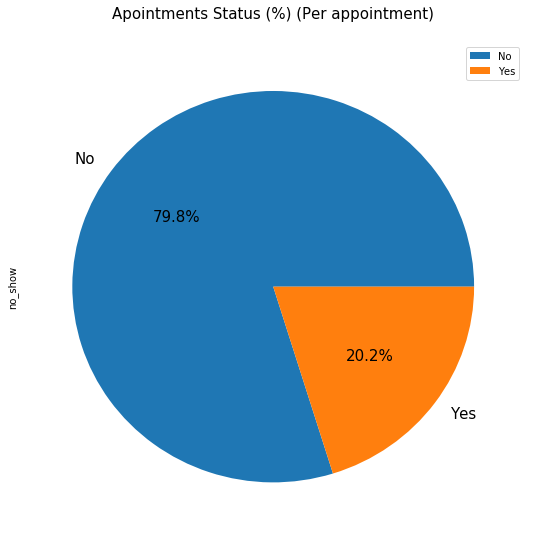

In [13]:
#Pie chart:
allP = df['no_show'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(9,9), autopct='%1.1f%%', fontsize = 15)
pieChart.set_title("Apointments Status" + ' (%) (Per appointment)\n', fontsize = 15)
plt.legend()

### Chart shows that 79.8 % of the total patients number showed-up to their appointments

In [14]:
#Gender Calculations:
all_appointments_by_f = len(df.loc[df['Gender'] == "F"])
all_appointments_by_m = len(df.loc[df['Gender'] == "M"])
all_show_appointments =  len(df.loc[df['no_show'] == "No"])
all_show_f= len(df.query('no_show == "No" and Gender == "F"'))

missed_appointments_by_f = len(df.query('no_show == "Yes" and Gender == "F"'))
missed_appointments_by_m = len(df.query('no_show == "Yes" and Gender == "M"'))

f_ratio=int(round(all_appointments_by_f/all_show_appointments*100))
all_show_f_ratio=int(round(all_show_f/all_show_appointments*100))
missed_ratio_f = int(round(missed_appointments_by_f/all_appointments_by_f*100))
missed_ratio_m = int(round(missed_appointments_by_m/all_appointments_by_m*100))

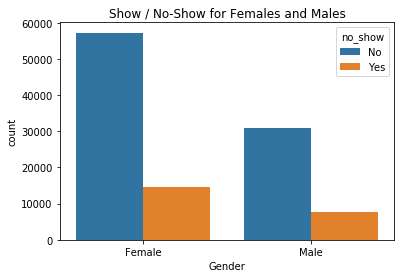

81% of the total patients are females
Total showed-up Patients Males&Females is 88207, 57245 of them were Females with the ratio 65%
Out of 71839 appointments made by females, 14594 were missed with the ratio of 20%.
Out of 38687 appointments made by males, 7725 were missed with the ratio of 20%.


In [15]:
#Gender Visualizations
ax = sns.countplot(x=df.Gender, hue=df.no_show, data=df)
ax.set_title("Show / No-Show for Females and Males")
ax.set_xticklabels(labels=["Female", "Male"])
sns.set(rc = {'figure.figsize':(10,6)})
sns.set_style("whitegrid")
plt.show();

#Gender Final results 
print('{}% of the total patients are females'.format(f_ratio))
print('Total showed-up Patients Males&Females is {}, {} of them were Females with the ratio {}%'.format(all_show_appointments,all_show_f,all_show_f_ratio))
print('Out of {} appointments made by females, {} were missed with the ratio of {}%.'.format(all_appointments_by_f, missed_appointments_by_f, missed_ratio_f))
print('Out of {} appointments made by males, {} were missed with the ratio of {}%.'.format(all_appointments_by_m, missed_appointments_by_m, missed_ratio_m))

### INSIGHT: 79.8 % of the total patients number showed-up to their appointments.  

### INSIGHT: 81% of the total patients are females.

### INSIGHT: Females showed-up to their appointments with the highest ratio 65% of total showed-up appointments!    


  
### Research Question 2  (Explaing our data in terms of Age,Scholarships given,Hypertesnion paients, Sms not/received?)  
### First : Age

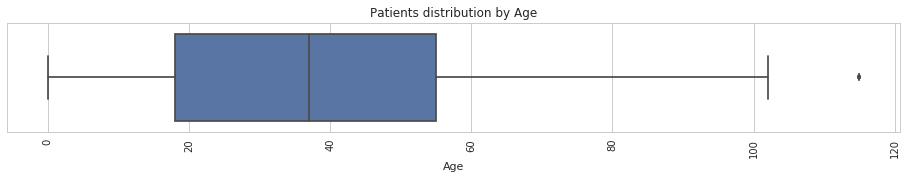

In [16]:
# Distribution of the patients Age 
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.Age)
dist_age.set_title("Patients distribution by Age")
plt.show()

#### our dataset contains an age outliers (patients higher than 102 years old), for better analysis we will remove this values.

In [17]:
# delete patients that are over 102
df = df.drop(df[df.Age > 102].index)

In [18]:
#Grouping patients by the distrbution above
bins= [0,10,19,26,36,46,56,66,150]
labels = ['Less than 10','10-18','19-25','26-35','36-45','46-55','56-65','More than 65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.groupby(['AgeGroup'])['PatientId'].count()

AgeGroup
Less than 10    17475
10-18           11391
19-25            9733
26-35           14404
36-45           14582
46-55           15437
56-65           14203
More than 65    13296
Name: PatientId, dtype: int64

#### now we have the counts of every age segment in our data, let's visualize it and find out which segment showed-up the most!

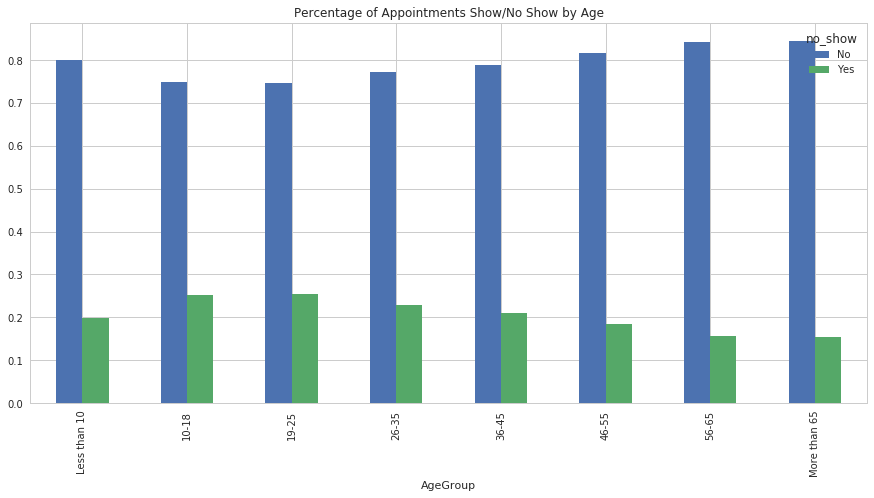

In [19]:
# appointment attendance by age
age = df.groupby('AgeGroup')['no_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,7))
age.set_title("Percentage of Appointments Show/No Show by Age")
sns.set_style("whitegrid")
plt.show()

### INSIGHT :Graph shows that the highest no-show age segment is from 10~35 years old.
### INSIGHT :Graph shows that the highest age segment showed-up is from 45~more than 65.

### Second : Scholarship

In [20]:
#scholarship calculations
non_scholars = len(df.query('Scholarship == 0'))
scholars= len(df.query('Scholarship == 1'))
all_appointments=len(df.loc[df['Scholarship']])


missed_scholars = len(df.query('no_show == "Yes" and Scholarship == 1'))
missed_nonscholars=len(df.query('no_show == "Yes" and Scholarship == 0'))

scholarsratio = int(round(scholars/all_appointments*100))
missed_scholars_ratio = int(round(missed_scholars/scholars*100))
missed_nonscholars_ratio= int(round(missed_nonscholars/non_scholars*100))


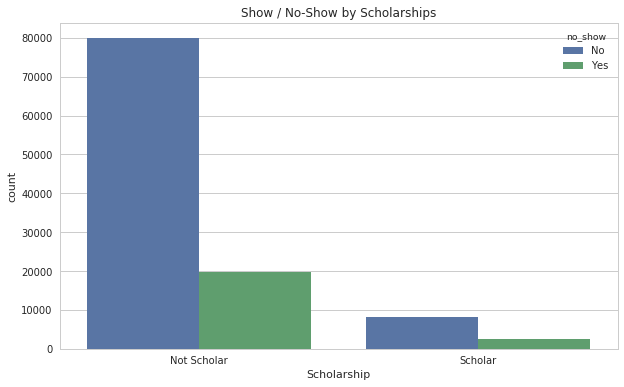

Out of 110521 appointments made by Patients, 10861 were Scholarships which is only 10%.
Out of 10861 appointments made by Scholar Patients, 2578 missed which is  24%.


NameError: name 'non_Scholars' is not defined

In [21]:
# Grouping patients who have scholarships by show/no show values to visualize it
ax = sns.countplot(x=df.Scholarship, hue=df.no_show, data=df)
ax.set_title("Show / No-Show by Scholarships")
ax.set_xticklabels(labels=["Not Scholar", "Scholar"])
sns.set_style("whitegrid")
plt.show();

#printing Insights
print('Out of {} appointments made by Patients, {} were Scholarships which is only {}%.'.format(all_appointments, scholars, scholarsratio))
print('Out of {} appointments made by Scholar Patients, {} missed which is  {}%.'.format(scholars, missed_scholars, missed_scholars_ratio))
print('Out of {} appointments made by Non-Scholar Patients, {} missed which is  {}%.'.format(non_Scholars, missed_nonscholars,missed_nonscholars_ratio))

### INSIGHT : Only 10% of total Patients have Scholarships.  

### INSIGHT : 80% of the patients with NO scholarship attended their appointent.  

### INSIGHT : 76% of the patient with A scholarship attended.    


### Third : Patients with Hypertension

In [ ]:
#Hypertension calculations
all_appointments=len(df.loc[df['Hipertension']])
non_hypers = len(df.query('Hipertension == 0'))
hypers= len(df.query('Hipertension == 1'))

missed_hypers = len(df.query('no_show == "Yes" and Hipertension == 1'))
missed_nonhypers=len(df.query('no_show == "Yes" and Hipertension == 0'))

hypersratio = int(round(hypers/all_appointments*100))
missed_hypers_ratio = int(round(missed_hypers/hypers*100))
missed_nonhypers_ratio= int(round(missed_nonhypers/non_hypers*100))

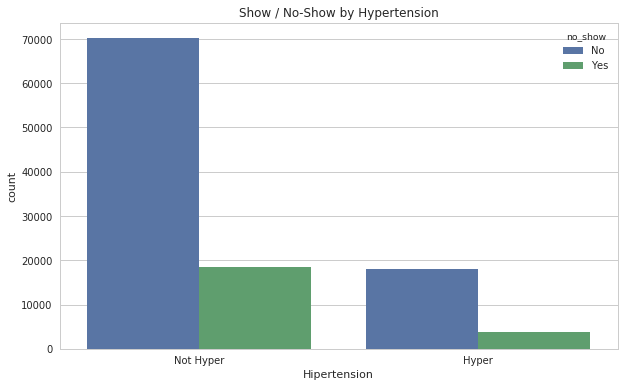

NameError: name 'hypers' is not defined

In [22]:
# Grouping patients who have scholarships by show/no show values to visualize it
ax = sns.countplot(x=df.Hipertension, hue=df.no_show, data=df)
ax.set_title("Show / No-Show by Hypertension")
ax.set_xticklabels(labels=["Not Hyper", "Hyper"])
sns.set_style("whitegrid")
plt.show();

#printing Insights
print('Out of {} appointments made by Patients, {} were Hypertension patients which is only {}%.'.format(all_appointments, hypers, hypersratio))
print('Out of {} appointments made by Hypertension Patients, {} missed which is  {}%.'.format(hypers, missed_hypers, missed_hypers_ratio))
print('Out of {} appointments made by Non-Hypertension Patients, {} missed which is  {}%.'.format(non_hypers, missed_nonhypers,missed_nonhypers_ratio))

### INSIGHT :  Only 20% of total Patients are Hypertenson Patients.  

### INSIGHT :  83% of Hypertension Patients attended their appointments.  

### INSIGHT :  79% of Non-Hypertension Patients attended their appointments.  

### Fourth:SMS Received

In [23]:
#Sms Received calculations:
not_received = len(df.query('SMS_received == 0'))
received= len(df.query('SMS_received == 1'))
all_appointments=len(df.loc[df['SMS_received']])

missed_received = len(df.query('no_show == "Yes" and SMS_received == 1'))
missed_not_received=len(df.query('no_show == "Yes" and SMS_received == 0'))

received_ratio = int(round(received/all_appointments*100))
missed_received_ratio = int(round(missed_received/received*100))
missed_not_received_ratio= int(round(missed_not_received/not_received*100))

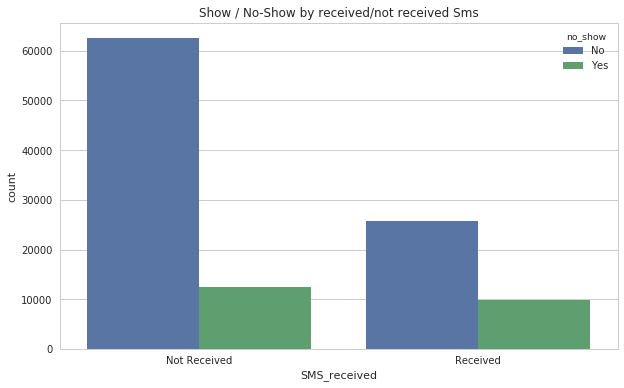

Out of 110521 appointments made by Patients, 35481 Received an Sms patients which is only 32%.
Out of 35481 appointments made by Patients who received an Sms, 9784 missed which is  28%.
Out of 75040 appointments made by  Patients who did not receive an Sms , 12532 missed which is  17%.


In [24]:
#grouping patients by received/not received ,show/no-show for visualizations:
ax = sns.countplot(x=df.SMS_received, hue=df.no_show, data=df)
ax.set_title("Show / No-Show by received/not received Sms")
ax.set_xticklabels(labels=["Not Received", "Received"])
sns.set_style("whitegrid")
plt.show();

#printing Insights
print('Out of {} appointments made by Patients, {} Received an Sms patients which is only {}%.'.format(all_appointments, received, received_ratio))
print('Out of {} appointments made by Patients who received an Sms, {} missed which is  {}%.'.format(received, missed_received, missed_received_ratio))
print('Out of {} appointments made by  Patients who did not receive an Sms , {} missed which is  {}%.'.format(not_received, missed_not_received,missed_not_received_ratio))

### INSIGHT:  Only 32% of total Patients received Sms.  

### INSIGHT:  72% of Patients who received Sms attended their appointments.  

### INSIGHT:  83% of  of Patients who didn't receiv Sms attended their appointments.  


### Fifth : Diabetes

In [25]:
#Sms Received calculations:
diabetic = len(df.query('Diabetes== 1'))
not_diabetic= len(df.query('Diabetes == 0'))
all_appointments=len(df.loc[df['Diabetes']])

missed_diabetic = len(df.query('no_show == "Yes" and Diabetes == 1'))
missed_not_diabetic=len(df.query('no_show == "Yes" and Diabetes == 0'))

diabetic_ratio = int(round(diabetic/all_appointments*100))
missed_diabetic_ratio = int(round(missed_diabetic/diabetic*100))
missed_not_diabetic_ratio= int(round(missed_not_diabetic/not_diabetic*100))

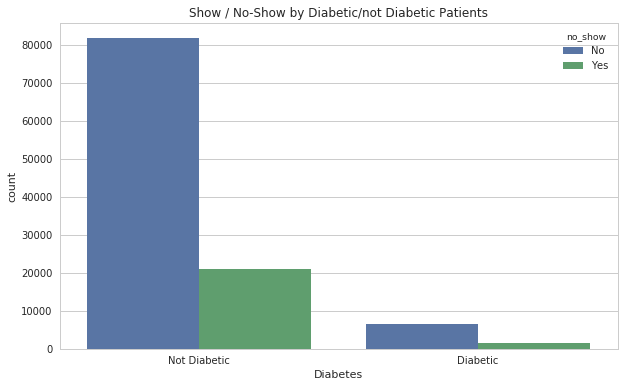

Out of 110521 appointments made by Patients,7943 are Diabetes patients which is only 7%.
Out of 7943 appointments made by Patients who are diabetic,1430 missed which is  18%.
Out of 102578 appointments made by  Patients who are not diabetic,20886 missed which is  20%.


In [26]:
#grouping patients by received/not received ,show/no-show for visualizations:
ax = sns.countplot(x=df.Diabetes, hue=df.no_show, data=df)
ax.set_title("Show / No-Show by Diabetic/not Diabetic Patients")
ax.set_xticklabels(labels=["Not Diabetic", "Diabetic"])
sns.set_style("whitegrid")
plt.show();

#printing Insights
print('Out of {} appointments made by Patients,{} are Diabetes patients which is only {}%.'.format(all_appointments, diabetic, diabetic_ratio))
print('Out of {} appointments made by Patients who are diabetic,{} missed which is  {}%.'.format(diabetic, missed_diabetic, missed_diabetic_ratio))
print('Out of {} appointments made by  Patients who are not diabetic,{} missed which is  {}%.'.format(not_diabetic, missed_not_diabetic,missed_not_diabetic_ratio))

### INSIGHT:  Only 7% of total Patients are diabetic.  

### INSIGHT:  82% of Patients who are diabetic attended their appointments.  

### INSIGHT:  80% of  of Patients who are not diabetic attended their appointments.  


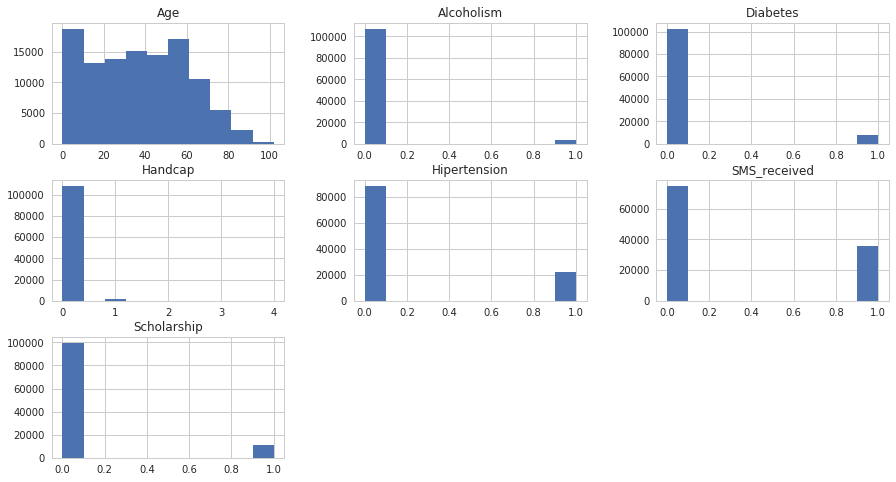

In [27]:
#sum up our eda with histograms 
df.hist(figsize=(15,8));

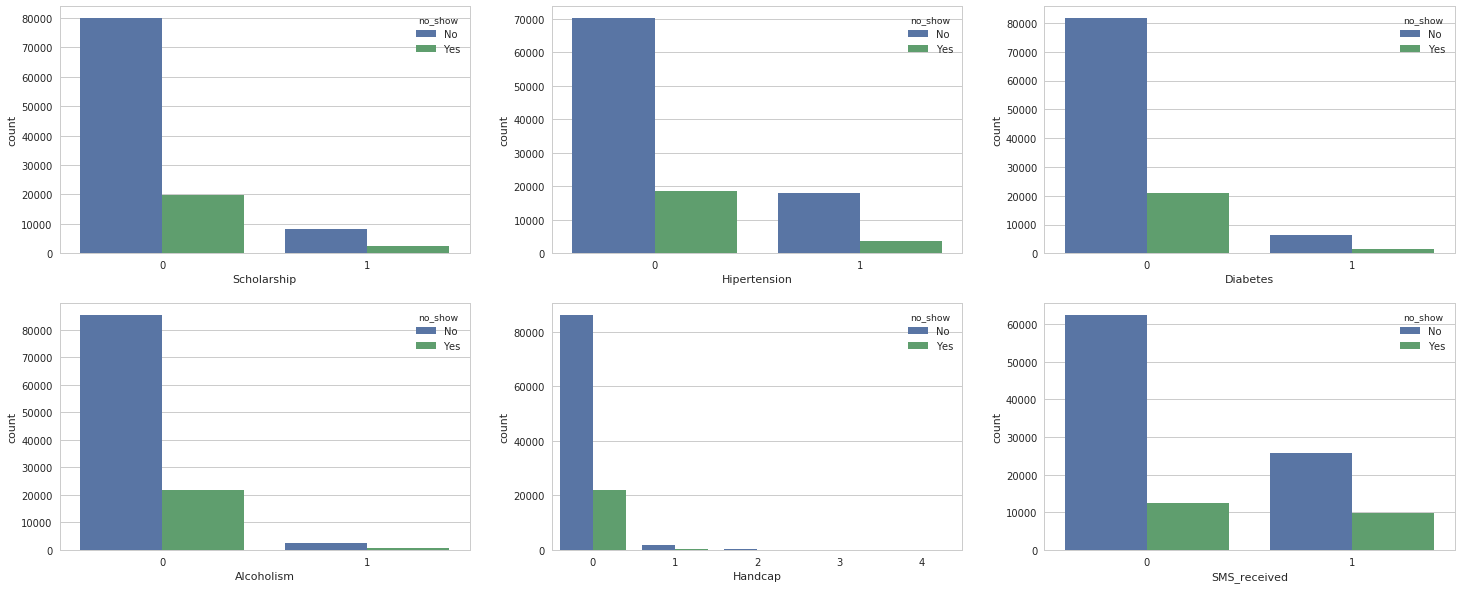

In [28]:
#sum up our eda with bar charts 
def get_bar_chart(df):

    feature = [
        "Scholarship",
        "Hipertension",
        "Diabetes",
        "Alcoholism",
        "Handcap",
        "SMS_received",
    ]  
    
    #columns I want to plot a bar for

    list(enumerate(feature))

    plt.figure(figsize=(25, 10))

    for i in enumerate(feature):
        plt.subplot(2, 3, i[0] + 1)
        sns.countplot(x=i[1], hue=df.no_show, data=df)
        
    plt.figure(figsize=(15,8))    
    plt.show()


get_bar_chart(df)

### Insight: from the previous histograms we noticed that we have a big numer of patients with 0 age 'babies'.

<a id='conclusions'></a>
## Conclusions
#1 79.8 % of the total patients number showed-up to their appointments.
#2 81% of the total patients are females.
#3 Females showed-up to their appointments with the highest ratio 65% of total showed-up appointments!
#4 Biggest age segment is 0 'babies', highest no-show age segment is from 10~35 years old.
#6 Highest age segment showed-up is from 45~more than 65.
#7 Only 10% of total Patients have Scholarships.
#8 80% of the patients with NO scholarship attended their appointent.
#9 76% of the patient with A scholarship attended.
#10 Only 20% of total Patients are Hypertenson Patients.
#11 83% of Hypertension Patients attended their appointments.
#12 79% of Non-Hypertension Patients attended their appointments.
#13 Only 32% of total Patients received Sms.
#14 72% of Patients who received Sms attended their appointments.
#15 83% of of Patients who didn't receiv Sms attended their appointments.
#16 Only 7% of total Patients are diabetic.
#17 82% of Patients who are diabetic attended their appointments.
#18 80% of of Patients who are not diabetic attended their appointments.


### Limitations
Missing features that could be useful to get more sure what is the most feature that impacts showing to the appointment such as if the patient is employed or not ,marital status, or whether the patient have a serieis medical history or not.


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0